### Handwritten Digit Recognition with Deep Learning

This project aims to build a deep learning model using Tensorflow to recognize handwritten digits from the MNIST dataset.  
The MNIST dataset is a widely-used benchmark dataset in machine learning, consisting of 28x28 pixel grayscale images of handwritten digits (0 through 9).  
This is a practice project. I am a beginner, and want to build intuition on what works and what may not.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split

# Let's load the dataset using keras
(train_images, train_labels), (test_images,test_labels) = mnist.load_data() # tensorflow has the MNIST dataset built in, so we don't need to get it from a website and can just load it using this function

# Display the shape of the dataset
print(f"Training data shape: {train_images.shape}, Training labels shape: {train_labels.shape}")
print(f"Test data shape: {test_images.shape}, Test labels shape: {test_labels.shape}")

Training data shape: (60000, 28, 28), Training labels shape: (60000,)
Test data shape: (10000, 28, 28), Test labels shape: (10000,)


### Visualizing the data

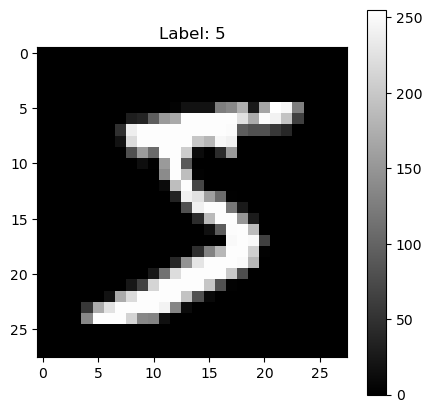

Min pixel value: 0
Max pixel value: 255


In [2]:
# This is the first time taking a look at the MNIST dataset , so I want to take a good look at what the data looks like.

# Let's look at the first image. The images are just a 28x28 table of numbers between 0 and 255. With this we give each number a grayscale value and then show it.
plt.figure(figsize=(5,5))
plt.imshow(train_images[0], cmap='gray')
plt.colorbar()
plt.title(f"Label: {train_labels[0]}")
plt.show()

# Get min and max values of pixel intensities
min_pixel_value = np.min(train_images) 
max_pixel_value = np.max(train_images) 

print(f"Min pixel value: {min_pixel_value}") # Minimum value is 0, so black = 0
print(f"Max pixel value: {max_pixel_value}") # Max value is 255, so white = 255

### Normalizing the data

In [14]:
# 255 is a big value, so lets normalize the data to a range between 0 and 1. Bigger numbers can get out of hand easily, and take longer to calculate.
if train_images.max() == 255: # if statement, just so I don't accidentally divide the data by 255 twice
    train_images = train_images.astype('float32') / 255.0
    test_images = test_images.astype('float32') / 255.0

# And to verify the normalization
print(f"Min pixel value after normalization: {train_images.min()}")
print(f"Max pixel value after normalization: {train_images.max()}")

Min pixel value after normalization: 0.0
Max pixel value after normalization: 1.0


### Convert images to vectors

In [15]:
# The neural net I want to use only accepts vectors, so let's reshape the 2d image into a 1d vector.

# train_images.shape[0] gives the number of images
# -1 tells NumPy to calculate the size of this dimension automatically
train_images_flattened = train_images.reshape(train_images.shape[0], -1)
test_images_flattened = test_images.reshape(test_images.shape[0], -1)

# Verify the new shape
print(f"New shape of training images: {train_images_flattened.shape}")
print(f"New shape of test images: {test_images_flattened.shape}")

# Instead of a 28x28 image it is now a list of 784 numbers

New shape of training images: (60000, 784)
New shape of test images: (10000, 784)


### Initial test NN

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# As an initial test NN, we're going to use two hidden layers, the first with 128, and the second with 64. Both using Relu as the activation function.
# This is just meant as a test. We'll try different amounts of laters and neurons later.
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Then to train the model we compiled above
history = model.fit(train_images_flattened, train_labels, 
                    epochs=10, 
                    batch_size=32, 
                    validation_split=0.2) # 20% of the training set is used to validate the model. This is to make sure the score is independent from the training data.

# let's see what the accuracy of the model is using the test data
test_loss, test_accuracy = model.evaluate(test_images_flattened, test_labels)
print(f"Test accuracy: {test_accuracy:.4f}")

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Epoch 1/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2691 - accuracy: 0.9201 - val_loss: 0.1526 - val_accuracy: 0.9533
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1159 - accuracy: 0.9649 - val_loss: 0.1045 - val_accuracy: 0.9690
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0803 - accuracy: 0.9755 - val_loss: 0.0955 - val_accuracy: 0.9704
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0623 - accuracy: 0.9804 - val_loss: 0.1154 - val_accuracy: 0.9651
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0454 - accuracy: 0.9853 - val_loss: 0.0993 - val_accuracy: 0.9708
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0381 - accuracy: 0.9879 - val_loss: 0.1014 - val_accuracy: 0.9714
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0292 - accuracy: 0.9905 - val_loss: 0.0862 - val_accuracy:

### Results
Accuracy: 97.63%  
Not bad for a first go.  
Again, this was just a test to see what a accuracy score might look like.  
We'll see later when we try neural nets with other structures whether 97.63% is actually good or not.

### Lets try a simple grid search to find good hyperparameters

In [8]:
# A function to create a model, with as inputs the amount of layers and neurons as hyperparameters.
def create_model(layers, neurons):
    model = Sequential()
    model.add(Dense(neurons, input_shape=(784,), activation='relu'))
    
    for _ in range(layers - 1):
        model.add(Dense(neurons, activation='relu'))
    
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Hyperparameters to try
layers_options = [1, 2, 3]
neurons_options = [128, 64, 32, 16]
epoch = 10

# Variables to store the best configuration
best_accuracy = 0
best_params = {'layers': None, 'neurons': None}

# Perform the grid search
for layers in layers_options:
    for neurons in neurons_options:
        
        model = create_model(layers, neurons)
        
        # Train the model
        history = model.fit(train_images_flattened, train_labels, 
                            epochs=epoch, 
                            batch_size=32, 
                            validation_split=0.2, 
                            verbose=0)
        
        # Get the accuracy on the validation set
        val_accuracy = history.history['val_accuracy'][-1]
    
        print("")
        print(f"Training model with {layers} layers and {neurons} neurons per layer...")
        print(f"Validation accuracy: {val_accuracy:.4f}")
        print("")
        
        # Check if this is the best model
        if val_accuracy > best_accuracy:
            best_accuracy = val_accuracy
            best_params['layers'] = layers
            best_params['neurons'] = neurons

print(f"Best validation accuracy: {best_accuracy:.4f} with layers: {best_params['layers']} and neurons: {best_params['neurons']}")




Training model with 1 layers and 128 neurons per layer...
Validation accuracy: 0.9703


Training model with 1 layers and 64 neurons per layer...
Validation accuracy: 0.9714


Training model with 1 layers and 32 neurons per layer...
Validation accuracy: 0.9650


Training model with 1 layers and 16 neurons per layer...
Validation accuracy: 0.9487


Training model with 2 layers and 128 neurons per layer...
Validation accuracy: 0.9759


Training model with 2 layers and 64 neurons per layer...
Validation accuracy: 0.9707


Training model with 2 layers and 32 neurons per layer...
Validation accuracy: 0.9646


Training model with 2 layers and 16 neurons per layer...
Validation accuracy: 0.9546


Training model with 3 layers and 128 neurons per layer...
Validation accuracy: 0.9776


Training model with 3 layers and 64 neurons per layer...
Validation accuracy: 0.9712


Training model with 3 layers and 32 neurons per layer...
Validation accuracy: 0.9618


Training model with 3 layers and 16 neu

### Result:  
Best validation accuracy: 97.76% with layers: 3 and neurons: 128  

The most complex model wins, which is not that much of a surprise.  
However, compared to the 97.63% accuracy of before, it isn't that much of an improvement.  

Increasing the amount of neurons seems to do more for the accuracy, so let's try increasing the amount of neurons even more to see what happens.

In [9]:
# Hyperparameters to try
layers_options = [3]
neurons_options = [256, 512, 1024]

# Variables to store the best configuration
best_accuracy = 0
best_params = None

# Perform the grid search
for neurons in neurons_options:
    
    model = create_model(layers_options[0], neurons)
        
    # Train the model
    history = model.fit(train_images_flattened, train_labels, 
                        epochs=epoch, 
                        batch_size=32, 
                        validation_split=0.2, 
                        verbose=0)
        
    # Get the accuracy on the validation set
    val_accuracy = history.history['val_accuracy'][-1]

    print("")
    print(f"Training model with {neurons} neurons...")
    print(f"Validation accuracy: {val_accuracy:.4f}")
    print("")
        
    # Check if this is the best model
    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        best_params = neurons

print(f"Best validation accuracy: {best_accuracy:.4f} with neurons: {best_params}")


Training model with 256 neurons...
Validation accuracy: 0.9778


Training model with 512 neurons...
Validation accuracy: 0.9775


Training model with 1024 neurons...
Validation accuracy: 0.9721

Best validation accuracy: 0.9778 with neurons: 256


### Result
It looks like the accurace improves with 256 neurons, and then drops.  
The 256 neuron model has an accuracy of 97.78%.  

I got a suggestion to use Early stopping and dropout, to increase the accurace even further.  
Dropout will randomly ignore neurons. This creates a kind of noise, and should reduce overfitting.  
Earlystopping should stop the model from training once it can't get any better.

Epoch 1/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2233 - accuracy: 0.9320 - val_loss: 0.1402 - val_accuracy: 0.9566
Epoch 2/50
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0951 - accuracy: 0.9710 - val_loss: 0.1284 - val_accuracy: 0.9622
Epoch 3/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0681 - accuracy: 0.9788 - val_loss: 0.1062 - val_accuracy: 0.9697
Epoch 4/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0543 - accuracy: 0.9828 - val_loss: 0.1126 - val_accuracy: 0.9683
Epoch 5/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0429 - accuracy: 0.9867 - val_loss: 0.1036 - val_accuracy: 0.9721
Epoch 6/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0374 - accuracy: 0.9886 - val_loss: 0.1068 - val_accuracy: 0.9737
Epoch 7/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0314 - accuracy: 0.9897 - val_loss: 0.1038 - val_accuracy:

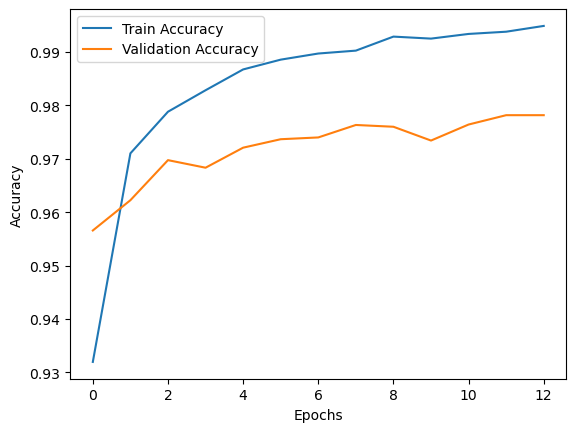

In [18]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

# Function to create model with dropout
def create_dropout_model(neurons, dropout_rate=0.2):
    model = Sequential()
    model.add(Dense(neurons, input_shape=(784,), activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Create the best model with 256 neurons and dropout
model = create_model(3, 256)

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(train_images_flattened, train_labels, 
                    epochs=50,  # Increase the number of epochs. It needs to be more, because we want it to go on until EarlyStopping has a chance to kick in.
                    batch_size=32, 
                    validation_split=0.2, 
                    callbacks=[early_stopping], 
                    verbose=1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images_flattened, test_labels, verbose=0)
print(f"Test accuracy: {test_accuracy:.4f}")

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Result
I got a slight drop in accuracy: 97.69%  
I ran it a second time, just to see if it was just pure luck, and then got a better score: 97.91%
  
All the accuracy scores so far have been very similar, so it have become unclear what is actually better, and what just got a good score by random luck.  

Instead of increasing the complexity of the model, let's try augmenting the data  
  
### Augment the data
For each training example, I want to have the following:  
the original images = This is the same as the training examples above. White = 1, black = 0  
negative images = This looks at the shape of the negative space, or background, instead of the written numbers. White = 0, black = 1  
scaled images = This looks at both the background and written numbers at the same time. White = 1, black = -1  

More data usually increases the accuracy. The above methods let the model look at the data in other ways that may be useful.

In [24]:
# Function to augment data
def augment_data(images):
    # Original images to [0, 1]
    original_images = images
    
    # Generate negative space features
    negative_images = 1.0 - images
    
    # Generate scaled features to [-1, 1]
    scaled_images = images * 2.0 - 1.0
    
    # Concatenate the original, negative, and scaled features along the second dimension
    augmented_images = np.concatenate([original_images, negative_images, scaled_images], axis=1)
    
    return augmented_images

# Apply the augmentation to training and test datasets
augmented_train_images = augment_data(train_images_flattened)
augmented_test_images = augment_data(test_images_flattened)

# Print the new shape of the augmented datasets
print(f"Augmented train images shape: {augmented_train_images.shape}")
print(f"Augmented test images shape: {augmented_test_images.shape}")

Augmented train images shape: (60000, 2352)
Augmented test images shape: (10000, 2352)


Epoch 1/10
1500/1500 [==============================] - 44s 29ms/step - loss: 0.3703 - accuracy: 0.8875 - val_loss: 0.2185 - val_accuracy: 0.9353
Epoch 2/10
1500/1500 [==============================] - 42s 28ms/step - loss: 0.2056 - accuracy: 0.9389 - val_loss: 0.1897 - val_accuracy: 0.9412
Epoch 3/10
1500/1500 [==============================] - 43s 29ms/step - loss: 0.1642 - accuracy: 0.9495 - val_loss: 0.1578 - val_accuracy: 0.9549
Epoch 4/10
1500/1500 [==============================] - 44s 29ms/step - loss: 0.1436 - accuracy: 0.9562 - val_loss: 0.1399 - val_accuracy: 0.9598
Epoch 5/10
1500/1500 [==============================] - 42s 28ms/step - loss: 0.1226 - accuracy: 0.9621 - val_loss: 0.1436 - val_accuracy: 0.9562
Epoch 6/10
1500/1500 [==============================] - 43s 28ms/step - loss: 0.1142 - accuracy: 0.9639 - val_loss: 0.1269 - val_accuracy: 0.9633
Epoch 7/10
1500/1500 [==============================] - 42s 28ms/step - loss: 0.1023 - accuracy: 0.9686 - val_loss: 0.1189 -

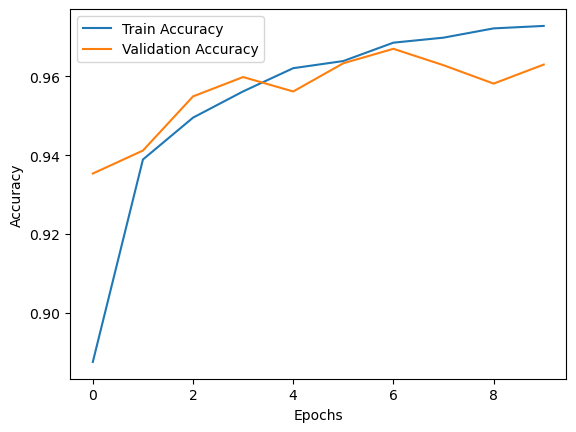

In [25]:
# First I want to try a simple model to see if it even does any better.
# 1 layer with 128 neurons has an accurace of 97.03 %. Let's try that.

# Function to create a simple neural network model
def create_simple_model(input_shape):
    model = Sequential()
    model.add(Dense(128, input_shape=(input_shape,), activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Get the input shape from the augmented dataset
input_shape = augmented_train_images.shape[1]

# Create the model
model = create_simple_model(input_shape)

# Train the model
history = model.fit(augmented_train_images, train_labels, 
                    epochs=10, 
                    batch_size=32, 
                    validation_split=0.2, 
                    verbose=1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(augmented_test_images, test_labels, verbose=0)
print(f"Test accuracy: {test_accuracy:.4f}")

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Results
The accuracy is 96.39%. So it is a little less than without the augmented data.
I guess the data is interfering with each other somehow?  
Let's try this again, but separately for each image method

In [26]:
# Function to augment data
def augment_data_separately(images):
    # Original images to [0, 1]
    original_images = images
    
    # Generate negative space features
    negative_images = 1.0 - images
    
    # Generate scaled features to [-1, 1]
    scaled_images = images * 2.0 - 1.0
    
    return original_images, negative_images, scaled_images

# Apply the augmentation to training and test datasets
train_images_original, train_images_negative, train_images_scaled = augment_data_separately(train_images_flattened)
test_images_original, test_images_negative, test_images_scaled = augment_data_separately(test_images_flattened)

# Print the new shape of the augmented datasets
print(f"Train images (original) shape: {train_images_original.shape}")
print(f"Train images (negative) shape: {train_images_negative.shape}")
print(f"Train images (scaled) shape: {train_images_scaled.shape}")


Train images (original) shape: (60000, 784)
Train images (negative) shape: (60000, 784)
Train images (scaled) shape: (60000, 784)


In [27]:
# Get the input shape from the dataset
input_shape = train_images_original.shape[1]

# Create the models
model_original = create_simple_model(input_shape)
model_negative = create_simple_model(input_shape)
model_scaled = create_simple_model(input_shape)

# Train the models separately
history_original = model_original.fit(train_images_original, train_labels, 
                                          epochs=10, 
                                          batch_size=32, 
                                          validation_split=0.2, 
                                          verbose=1)

history_negative = model_negative.fit(train_images_negative, train_labels, 
                                      epochs=10, 
                                      batch_size=32, 
                                      validation_split=0.2, 
                                      verbose=1)

history_scaled = model_scaled.fit(train_images_scaled, train_labels, 
                                  epochs=10, 
                                  batch_size=32, 
                                  validation_split=0.2, 
                                  verbose=1)

# Evaluate the models on the test set
test_loss_original, test_accuracy_original = model_original.evaluate(test_images_original, test_labels, verbose=0)
test_loss_negative, test_accuracy_negative = model_negative.evaluate(test_images_negative, test_labels, verbose=0)
test_loss_scaled, test_accuracy_scaled = model_scaled.evaluate(test_images_scaled, test_labels, verbose=0)

print(f"Test accuracy (original): {test_accuracy_original:.4f}")
print(f"Test accuracy (negative): {test_accuracy_negative:.4f}")
print(f"Test accuracy (scaled): {test_accuracy_scaled:.4f}")


Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2872 - accuracy: 0.9175 - val_loss: 0.1598 - val_accuracy: 0.9547
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1281 - accuracy: 0.9623 - val_loss: 0.1163 - val_accuracy: 0.9661
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0893 - accuracy: 0.9732 - val_loss: 0.1044 - val_accuracy: 0.9700
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0673 - accuracy: 0.9800 - val_loss: 0.0931 - val_accuracy: 0.9731
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0505 - accuracy: 0.9842 - val_loss: 0.0972 - val_accuracy: 0.9714
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0395 - accuracy: 0.9875 - val_loss: 0.0810 - val_accuracy: 0.9766
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0303 - accuracy: 0.9910 - val_loss: 0.0797 - val_accuracy:

### Results
Test accuracy (original): 97.42%  
Test accuracy (negative): 94.91%  
Test accuracy (scaled): 97.28%  

Very interesting. I understand why the negative image might not be as good, but the scaled image should be able to pull from both the shape of the digit,  
and the shape of the negative space, and intuitively, I felt like it should do better.  
  
The difference is small though, so let me run it again, see what happens:  
Test accuracy (original): 97.66%  
Test accuracy (negative): 96.25%  
Test accuracy (scaled): 96.66%  

This time the difference is a lot bigger. The original images are definitely the best.

### Final runs
The accuracy is a bit random, which might just be because the previous runs all used 10 batches,  instead of using Early Stopping, which goes on until it gets the best accuracy.  
Let's do one final run, where we put all four datasets into a complex model, with Dropout and EarlyeStopping again.  
4 layers, each with half the neurons of the layer before it.

In [32]:
# Function to create a more complex neural network model
def create_complex_model(input_shape):
    model = Sequential()
    model.add(Dense(512, input_shape=(input_shape,), activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Get the input shape from the dataset
input_shape = train_images_original.shape[1]
input_shape_all = augmented_train_images.shape[1]

# Create the models
model_one = create_complex_model(input_shape)
model_all = create_complex_model(input_shape_all)

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the models
history_all = model_all.fit(augmented_train_images, train_labels, 
                                  epochs=50, 
                                  batch_size=128, 
                                  validation_split=0.2, 
                                  callbacks=[early_stopping], 
                                  verbose=1)

history_original = model_one.fit(train_images_original, train_labels, 
                                          epochs=50,
                                          batch_size=128, 
                                          validation_split=0.2, 
                                          callbacks=[early_stopping], 
                                          verbose=1)

history_negative = model_one.fit(train_images_negative, train_labels, 
                                      epochs=50, 
                                      batch_size=128, 
                                      validation_split=0.2, 
                                      callbacks=[early_stopping], 
                                      verbose=1)

history_scaled = model_one.fit(train_images_scaled, train_labels, 
                                  epochs=50, 
                                  batch_size=128, 
                                  validation_split=0.2, 
                                  callbacks=[early_stopping], 
                                  verbose=1)

# Evaluate the models on the test set
test_loss_all, test_accuracy_all = model_all.evaluate(augmented_test_images, test_labels, verbose=0)
test_loss_original, test_accuracy_original = model_original.evaluate(test_images_original, test_labels, verbose=0)
test_loss_negative, test_accuracy_negative = model_negative.evaluate(test_images_negative, test_labels, verbose=0)
test_loss_scaled, test_accuracy_scaled = model_scaled.evaluate(test_images_scaled, test_labels, verbose=0)

print(f"Test accuracy (all): {test_accuracy_all:.4f}")
print(f"Test accuracy (original): {test_accuracy_original:.4f}")
print(f"Test accuracy (negative): {test_accuracy_negative:.4f}")
print(f"Test accuracy (scaled): {test_accuracy_scaled:.4f}")


Epoch 1/50
375/375 [==============================] - 5s 11ms/step - loss: 0.7012 - accuracy: 0.7752 - val_loss: 0.2331 - val_accuracy: 0.9304
Epoch 2/50
375/375 [==============================] - 4s 11ms/step - loss: 0.3265 - accuracy: 0.9055 - val_loss: 0.1829 - val_accuracy: 0.9455
Epoch 3/50
375/375 [==============================] - 4s 11ms/step - loss: 0.2670 - accuracy: 0.9233 - val_loss: 0.1582 - val_accuracy: 0.9526
Epoch 4/50
375/375 [==============================] - 4s 11ms/step - loss: 0.2275 - accuracy: 0.9360 - val_loss: 0.1411 - val_accuracy: 0.9601
Epoch 5/50
375/375 [==============================] - 4s 10ms/step - loss: 0.2079 - accuracy: 0.9399 - val_loss: 0.1501 - val_accuracy: 0.9526
Epoch 6/50
375/375 [==============================] - 4s 10ms/step - loss: 0.1994 - accuracy: 0.9427 - val_loss: 0.1268 - val_accuracy: 0.9623
Epoch 7/50
375/375 [==============================] - 4s 11ms/step - loss: 0.1813 - accuracy: 0.9476 - val_loss: 0.1192 - val_accuracy: 0.9656

### Results
Test accuracy (all): 97.59%  
Test accuracy (original): 97.56%  
Test accuracy (negative): 96.25%  
Test accuracy (scaled): 97.04%  

This time the bigger dataset was better by 0.03%. I don't think that is worth the extra compute it would require.  
Not to mention that much smaller models did even better with just the original images.  

### Conclusion
It is hard to say whether throwing in all the extra layers and neurons is worth the squeeze.  
After all, in earlier test, just 1 layer with a mere 16 neurons already achieves almost an accuracy of 95%.  
It is clear that we are getting diminishing returns, and that there is a limit to how accurate we can get with this dataset.  
That said, I have seen others achieve over 99% accuracy using other methods. Maybe I'll come back to this dataset after more studying.  
For now I am happy with my practice. I feel this may have improved my intuition on what works, and on when a model is too complex for it's own good.